# 주제 : 게임 데이터로 판매량 및 유저점수 예측하기
----------
    
## 데이터 소개
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

rm: cannot remove 'sample_data': Is a directory
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 63.4MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [ ]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
df['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

In [ ]:
df['User_Score'] = df['User_Score'].astype(float)

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] - df['Global_Sales'] < 1).sum()

6825

### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

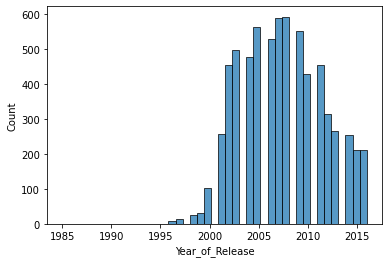

In [ ]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인

sns.histplot(df, x='Year_of_Release')

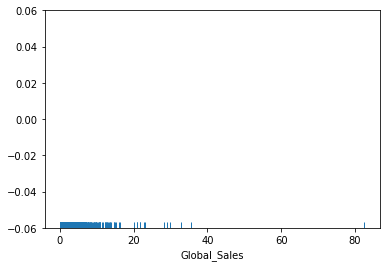

In [ ]:
sns.rugplot(data=df, x='Global_Sales')

In [ ]:
df[df['Global_Sales']>30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E


In [ ]:
gs = df['Global_Sales'].quantile(0.99)
gs

7.167600000000002

In [ ]:
df = df[df['Global_Sales'] < gs]

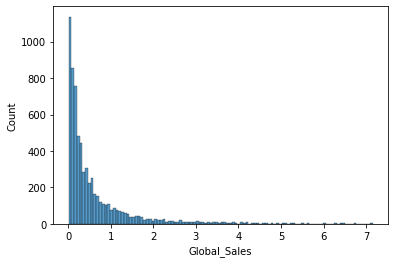

In [ ]:
sns.histplot(data=df, x='Global_Sales')

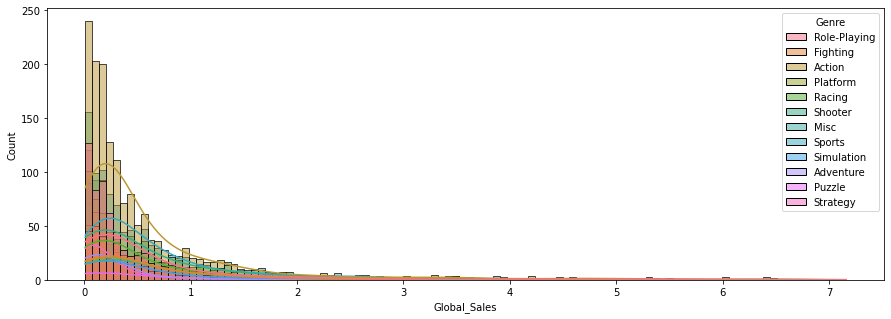

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Global_Sales', hue='Genre', kde=True)

In [ ]:
# fig = plt.figure()
# sns.histplot(data = df, x='NA_Sales')
# plt.xlim(0, 4)

In [ ]:
# s1 = df['NA_Sales'].quantile(0.95)
# # s2 = df['NA_Sales'].quantile(0.1)
# print(s1)

In [ ]:
# df = df[(df['NA_Sales'] < s1)]
# sns.histplot(data = df, x='NA_Sales')

In [ ]:
# sns.histplot(data=df, x='EU_Sales')
# plt.xlim(0, 1)

In [ ]:
# col = 'EU_Sales'
# s1 = df[col].quantile(0.95)
# print(s1)

In [ ]:
# df = df[(df['EU_Sales'] < s1)]

In [ ]:
# sns.histplot(data=df, x='EU_Sales')

In [ ]:
# df['JP_Sales'].hist()

In [ ]:
# s1 = df['JP_Sales'].quantile(0.95)
# print(s1)

In [ ]:
# df = df[df['JP_Sales'] < s1]
# sns.histplot(data=df, x='JP_Sales')

In [ ]:
# df['Other_Sales'].hist()

In [ ]:
# s1 = df['Other_Sales'].quantile(0.95)
# s1

In [ ]:
# df = df[df['Other_Sales'] < s1]
# df['Other_Sales'].hist()

In [ ]:
# df['Global_Sales'].hist()

In [ ]:
# s1 = df['Global_Sales'].quantile(0.95)
# s1

In [ ]:
# df = df[df['Global_Sales'] < s1]
# df['Global_Sales'].hist()

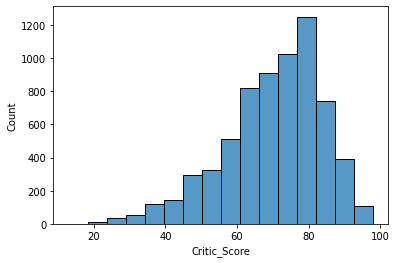

In [ ]:
sns.histplot(data=df, x='Critic_Score', bins=16)

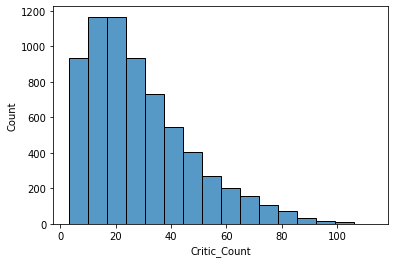

In [ ]:
sns.histplot(data=df, x='Critic_Count', bins=16)

In [ ]:
# s1 = df['Critic_Count'].quantile(0.99)
# s1

In [ ]:
# df = df[df['Critic_Count'] < s1]
# df['Critic_Count'].hist()

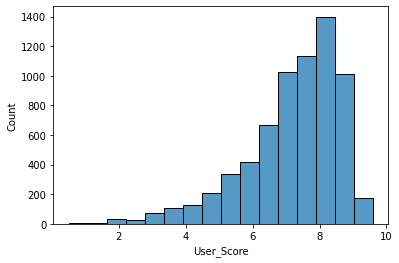

In [ ]:
sns.histplot(data=df['User_Score'].apply(float), bins=16)

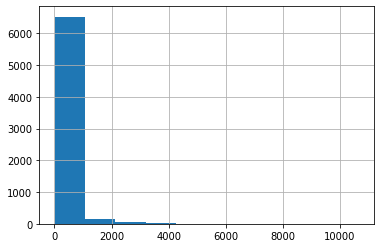

In [ ]:
df['User_Count'].hist()

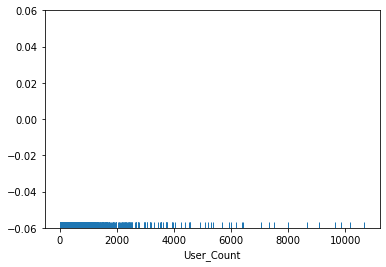

In [ ]:
sns.rugplot(x='User_Count', data=df)

In [ ]:
s1 = df['User_Count'].quantile(0.99)
s1

2454.8999999999996

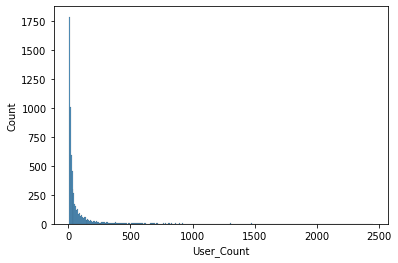

In [ ]:
df = df[df['User_Count'] < s1]
sns.histplot(df['User_Count'])

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

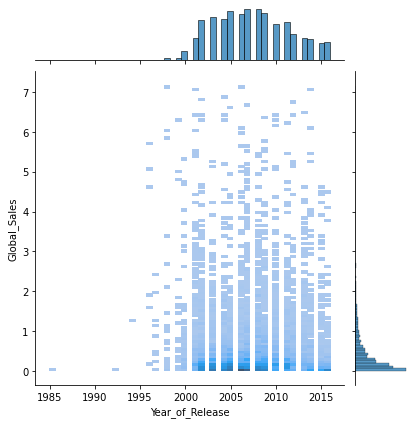

In [ ]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석

sns.jointplot(data=df, x='Year_of_Release', y='Global_Sales', kind='hist')

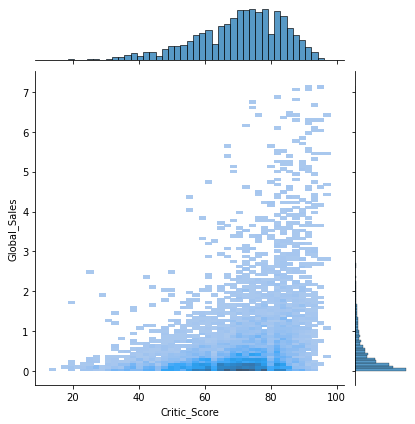

In [ ]:
sns.jointplot(data=df, x='Critic_Score', y='Global_Sales', kind='hist')

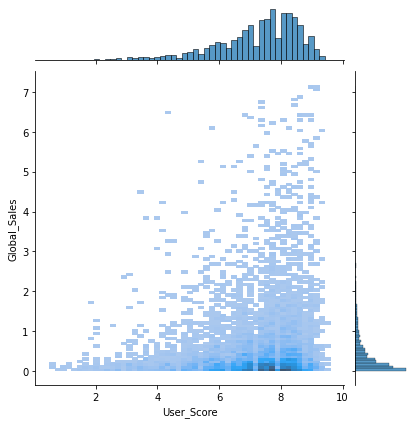

In [ ]:
# df['User_Score'] = df['User_Score'].apply(float)
sns.jointplot(data=df, x='User_Score', y='Global_Sales', kind='hist')

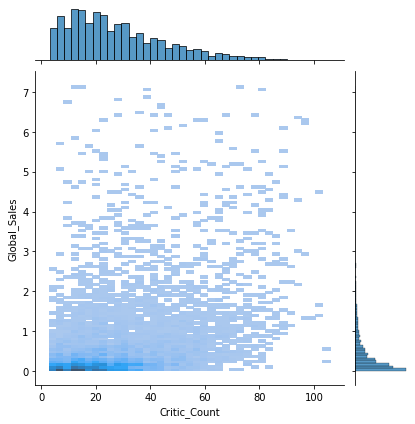

In [ ]:
sns.jointplot(data=df, x='Critic_Count', y='Global_Sales', kind='hist')

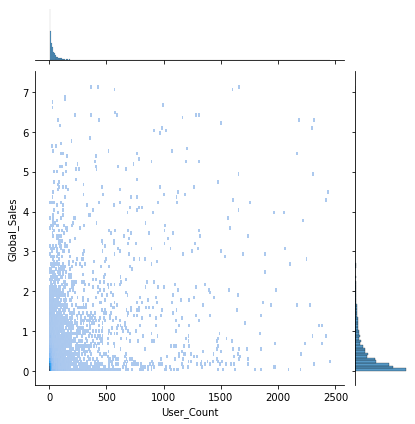

In [ ]:
sns.jointplot(data=df, x='User_Count', y='Global_Sales', kind='hist')

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

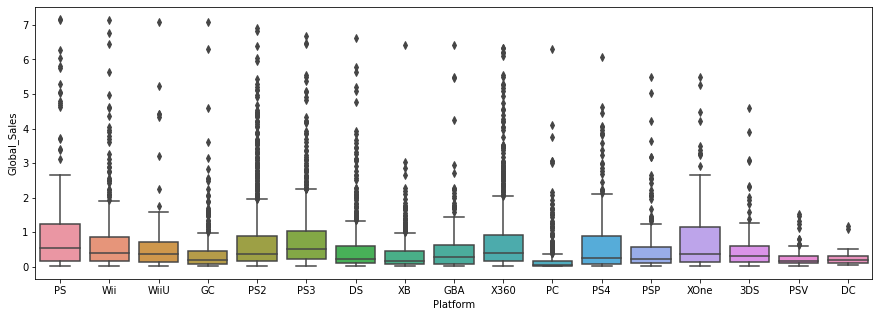

In [ ]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석

fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Platform', y='Global_Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

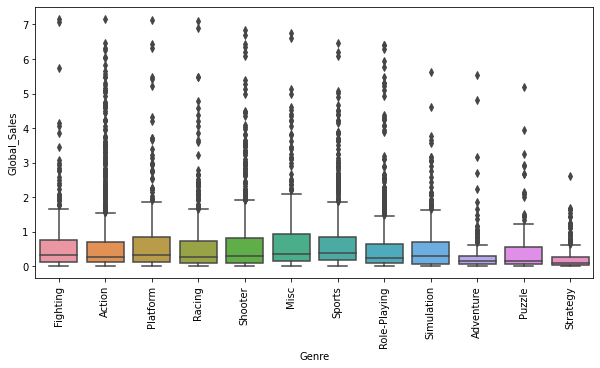

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Genre', y='Global_Sales')
plt.xticks(rotation=90)

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000
mean,2007.394737,0.325051,0.183115,0.049421,0.064357,0.622132,69.944378,28.270634,7.183597,119.207087
std,4.191468,0.496225,0.339764,0.186430,0.130320,0.918861,13.754841,18.512430,1.432806,279.193854
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.280000,72.000000,24.000000,7.500000,26.000000
75%,2010.000000,0.370000,0.200000,0.010000,0.070000,0.720000,80.000000,39.000000,8.200000,82.000000
max,2016.000000,4.980000,6.210000,4.350000,2.930000,7.160000,98.000000,106.000000,9.600000,2454.000000


In [ ]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함

# df['Critic_S'] = df['Critic_Score'] / 10
# sns.jointplot(data=df, x='User_Score', y='Critic_S', hue='Platform')

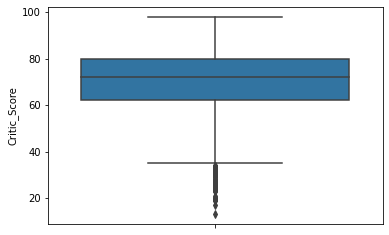

In [ ]:
sns.boxplot(y='Critic_Score', data=df)

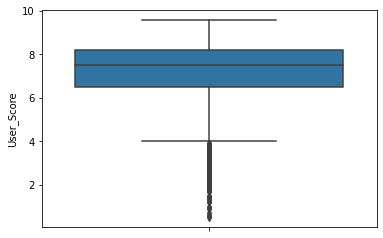

In [ ]:
sns.boxplot(y='User_Score', data=df)

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'
critic_score

,Score,ScoreBy
106,96.0,Critics
107,95.0,Critics
109,91.0,Critics
110,88.0,Critics
111,92.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [ ]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score': 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'
user_score

,Score,ScoreBy
106,91.0,Users
107,90.0,Users
109,89.0,Users
110,91.0,Users
111,91.0,Users
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


In [ ]:
scores = pd.concat([critic_score, user_score], axis=0)
scores

,Score,ScoreBy
106,96.0,Critics
107,95.0,Critics
109,91.0,Critics
110,88.0,Critics
111,92.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


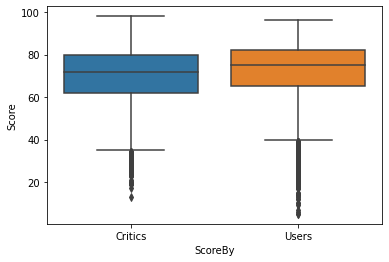

In [ ]:
sns.boxplot(data=scores, x='ScoreBy', y='Score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

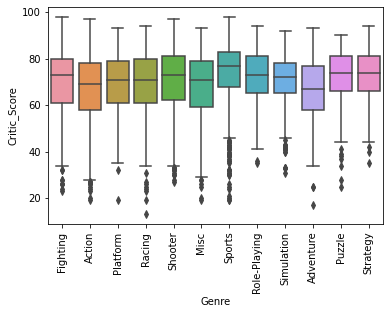

In [ ]:
sns.boxplot(data=df, x='Genre', y='Critic_Score')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

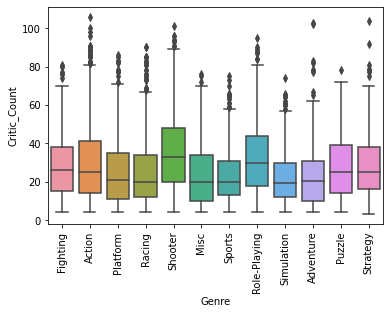

In [ ]:
sns.boxplot(data=df, x='Genre', y='Critic_Count')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

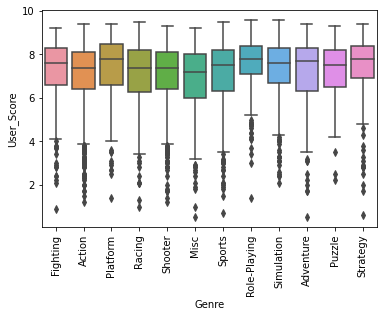

In [ ]:
sns.boxplot(data=df, x='Genre', y='User_Score')
plt.xticks(rotation=90)

### 문제 9. 수치형 데이터간의 상관성 시각화하기

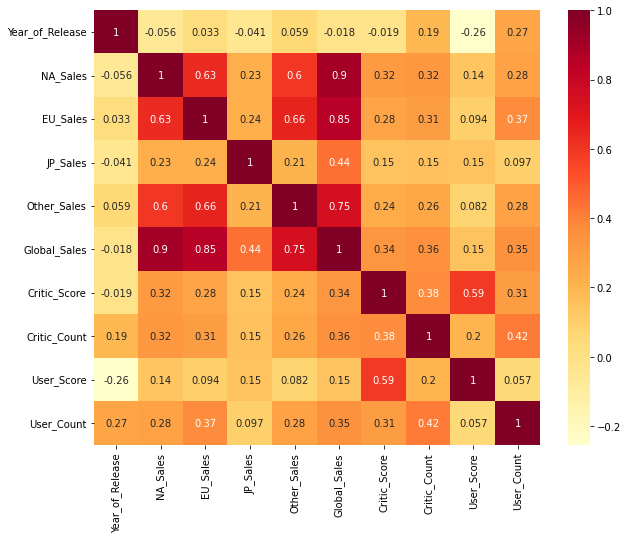

In [ ]:
# Correlation Heatmap 시각화하기

fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")
plt.show()

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

In [ ]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인

df['Platform'].value_counts()

PS2     1133
X360     840
PS3      748
PC       609
XB       564
Wii      464
DS       457
PSP      389
GC       348
GBA      237
PS4      224
XOne     157
3DS      151
PS       146
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [ ]:
df['Year_of_Release'].value_counts()

2007.0    583
2008.0    581
2005.0    557
2009.0    537
2006.0    525
2003.0    497
2004.0    471
2002.0    454
2011.0    435
2010.0    414
2012.0    301
2001.0    253
2013.0    253
2014.0    245
2016.0    208
2015.0    200
2000.0    102
1999.0     28
1998.0     25
1997.0     10
1996.0      6
1994.0      1
1985.0      1
1992.0      1
Name: Year_of_Release, dtype: int64

In [ ]:
df['Genre'].value_counts()

Action          1601
Sports           937
Shooter          823
Role-Playing     689
Racing           572
Platform         396
Fighting         377
Misc             375
Simulation       292
Strategy         263
Adventure        246
Puzzle           117
Name: Genre, dtype: int64

(0.0, 50.0)

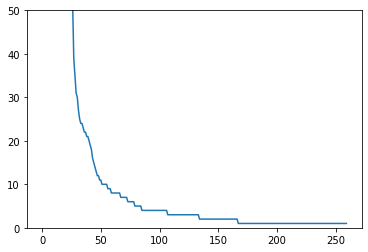

In [ ]:
col = 'Publisher'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.ylim(0, 50)

In [ ]:
df[col].value_counts()[20:]

505 Games                     79
Deep Silver                   75
Disney Interactive Studios    74
LucasArts                     70
Acclaim Entertainment         66
                              ..
10TACLE Studios                1
Bohemia Interactive            1
Groove Games                   1
Level 5                        1
Wargaming.net                  1
Name: Publisher, Length: 240, dtype: int64

In [ ]:
n_categorical = 50
cate = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in cate else 'other')

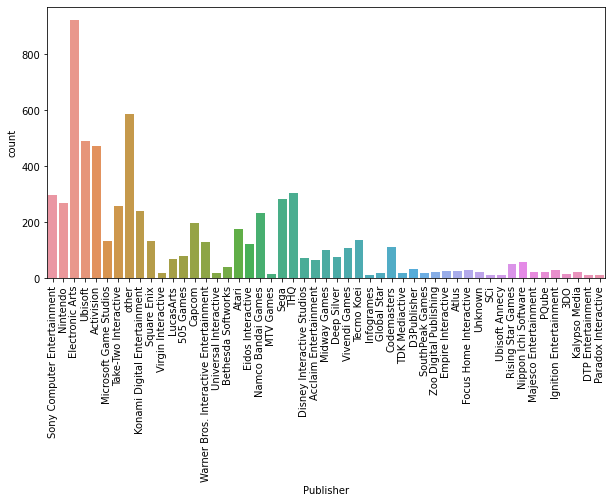

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Publisher')
plt.xticks(rotation=90)
plt.show()

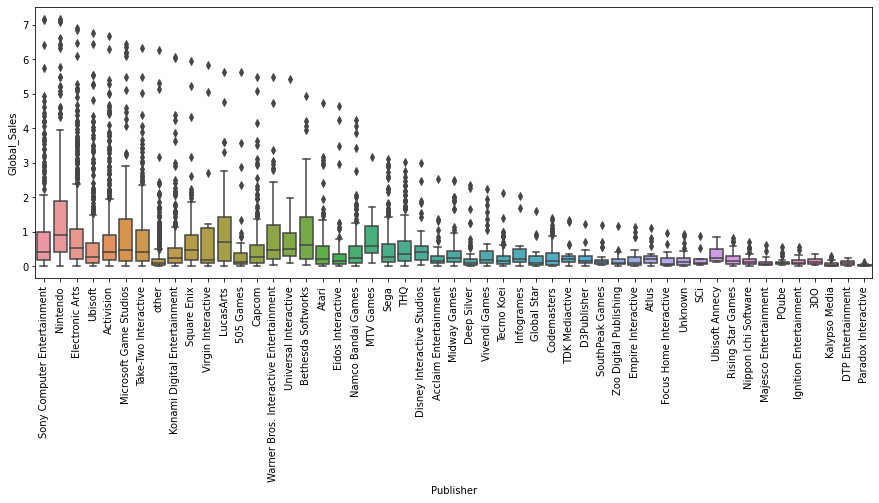

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Publisher', y='Global_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
col = 'Developer'
df[col].value_counts()

EA Canada                                    149
EA Sports                                    141
Capcom                                       126
Ubisoft                                      101
Konami                                        95
                                            ... 
Arcade Moon                                    1
Agenda                                         1
High Moon Studios, Mercenary Technologies      1
1C, Ino-Co, 1C Company                         1
Interactive Brains                             1
Name: Developer, Length: 1283, dtype: int64

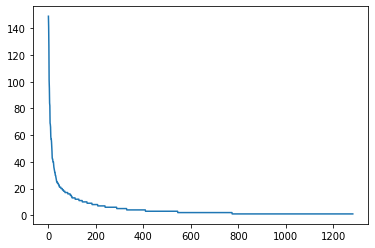

In [ ]:
plt.plot(range(len(df[col].value_counts())), df[col].value_counts())

In [ ]:
df[col].value_counts()[20]

40

In [ ]:
n = 20
cate = df[col].value_counts()[n:]
df[col] = df[col].apply(lambda s: s if str(s) not in cate else 'other')
df[col].value_counts()

other                      5212
EA Canada                   149
EA Sports                   141
Capcom                      126
Ubisoft                     101
Konami                       95
Ubisoft Montreal             84
EA Tiburon                   82
Omega Force                  69
Visual Concepts              68
Electronic Arts              66
Traveller's Tales            59
Codemasters                  57
Vicarious Visions            57
Namco                        55
Nintendo                     52
Yuke's                       48
TT Games                     43
Neversoft Entertainment      42
Midway                       42
From Software                40
Name: Developer, dtype: int64

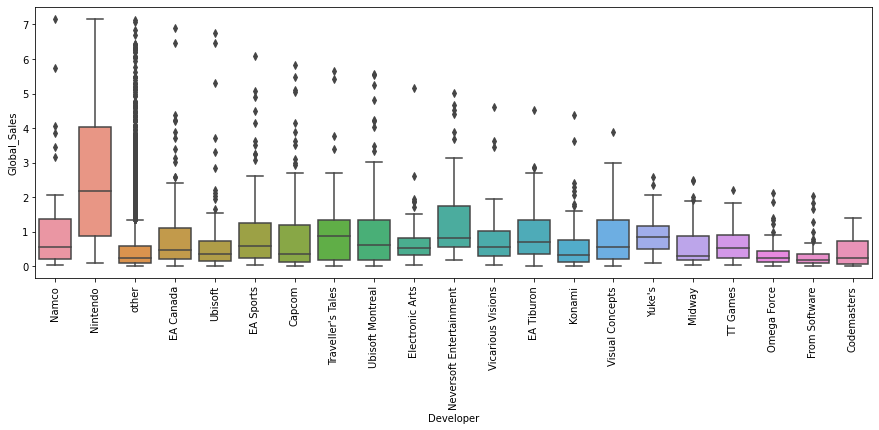

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Developer', y='Global_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Rating'].value_counts()

T       2358
E       2050
M       1353
E10+     924
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [ ]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)#.astype(str)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T
107,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.74,2.14,0.60,0.68,7.15,95.0,73.0,9.0,1658.0,Nintendo,T
109,Crash Bandicoot 3: Warped,PS,1998,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13,91.0,12.0,8.9,432.0,other,E
110,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
111,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,other,T


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6688 entries, 106 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6688 non-null   object 
 1   Platform         6688 non-null   object 
 2   Year_of_Release  6688 non-null   int64  
 3   Genre            6688 non-null   object 
 4   Publisher        6688 non-null   object 
 5   NA_Sales         6688 non-null   float64
 6   EU_Sales         6688 non-null   float64
 7   JP_Sales         6688 non-null   float64
 8   Other_Sales      6688 non-null   float64
 9   Global_Sales     6688 non-null   float64
 10  Critic_Score     6688 non-null   float64
 11  Critic_Count     6688 non-null   float64
 12  User_Score       6688 non-null   float64
 13  User_Count       6688 non-null   float64
 14  Developer        6688 non-null   object 
 15  Rating           6688 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 1.2+ MB


In [ ]:
# X_cat = df[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating']]
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_505 Games,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Atari,Publisher_Atlus,Publisher_Bethesda Softworks,Publisher_Capcom,Publisher_Codemasters,Publisher_D3Publisher,Publisher_DTP Entertainment,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Empire Interactive,Publisher_Focus Home Interactive,Publisher_Global Star,Publisher_Ignition Entertainment,Publisher_Infogrames,Publisher_Kalypso Media,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_MTV Games,Publisher_Majesco Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_PQube,Publisher_Paradox Interactive,Publisher_Rising Star Games,Publisher_SCi,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_SouthPeak Games,Publisher_Square Enix,Publisher_TDK Mediactive,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing,Publisher_other
106,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16696,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

# X_num = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_S', 'Critic_Count', 'User_Count']]
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [ ]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_505 Games,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Atari,Publisher_Atlus,Publisher_Bethesda Softworks,Publisher_Capcom,Publisher_Codemasters,Publisher_D3Publisher,Publisher_DTP Entertainment,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Empire Interactive,Publisher_Focus Home Interactive,Publisher_Global Star,Publisher_Ignition Entertainment,Publisher_Infogrames,Publisher_Kalypso Media,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_MTV Games,Publisher_Majesco Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_PQube,Publisher_Paradox Interactive,Publisher_Rising Star Games,Publisher_SCi,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_SouthPeak Games,Publisher_Square Enix,Publisher_TDK Mediactive,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing,Publisher_other
106,-2.241563,1.894429,-0.716904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,-0.332781,1.821722,2.416361,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,-2.241563,1.530893,-0.878969,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,1.576001,1.312772,2.902557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,-1.525770,1.603601,0.525598,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 문제 13. XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 14. Linear Regression 모델 생성/학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print(mean_absolute_error(y_test, pred_xgb))
print(sqrt(mean_squared_error(y_test, pred_xgb)))
print(mean_absolute_error(y_test, pred_lr))
print(sqrt(mean_squared_error(y_test, pred_lr)))

0.41283059603905403
0.6816863522695881
0.4751081856234273
0.7361700581219922


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


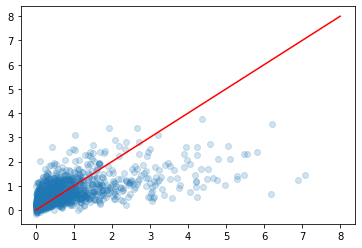

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기

plt.scatter(y_test, pred_xgb, alpha=0.2)
plt.plot([0, 8], [0, 8], 'r-')

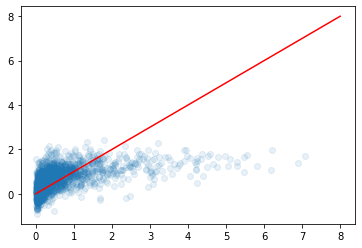

In [ ]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0, 8], 'r-')

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

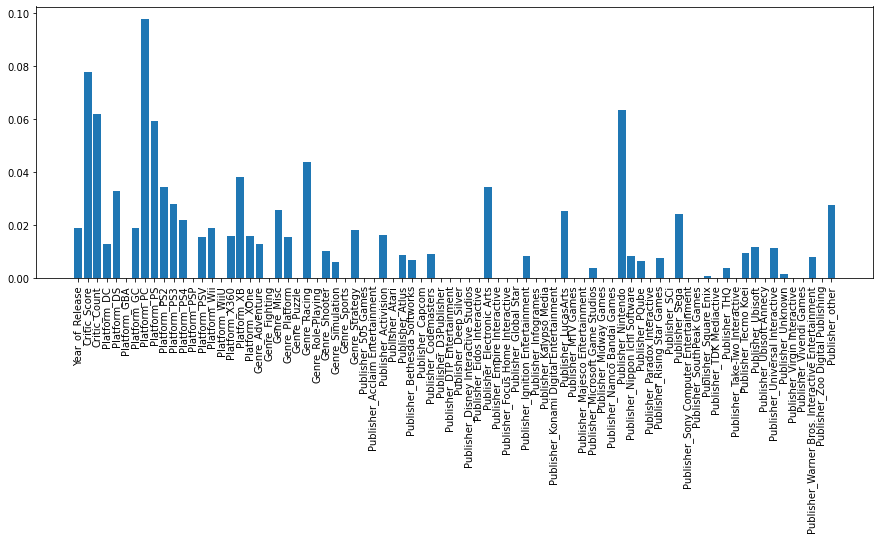

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['User_Score']

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기

pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print(mean_absolute_error(y_test, pred_xgb))
print(sqrt(mean_squared_error(y_test, pred_xgb)))
print(mean_absolute_error(y_test, pred_lr))
print(sqrt(mean_squared_error(y_test, pred_lr)))

0.7621574212973784
1.0399611136411486
0.8008761398262922
1.0759198849929907


### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


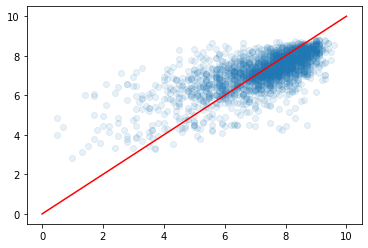

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기

plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 10], [0, 10], 'r-')

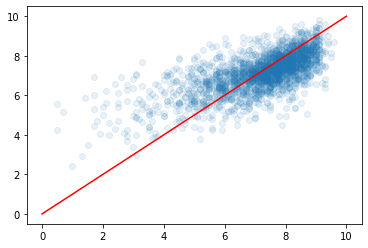

In [ ]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 10], [0, 10], 'r-')

### 문제 23. XGBoost 모델의 Feature Importance 시각화하기

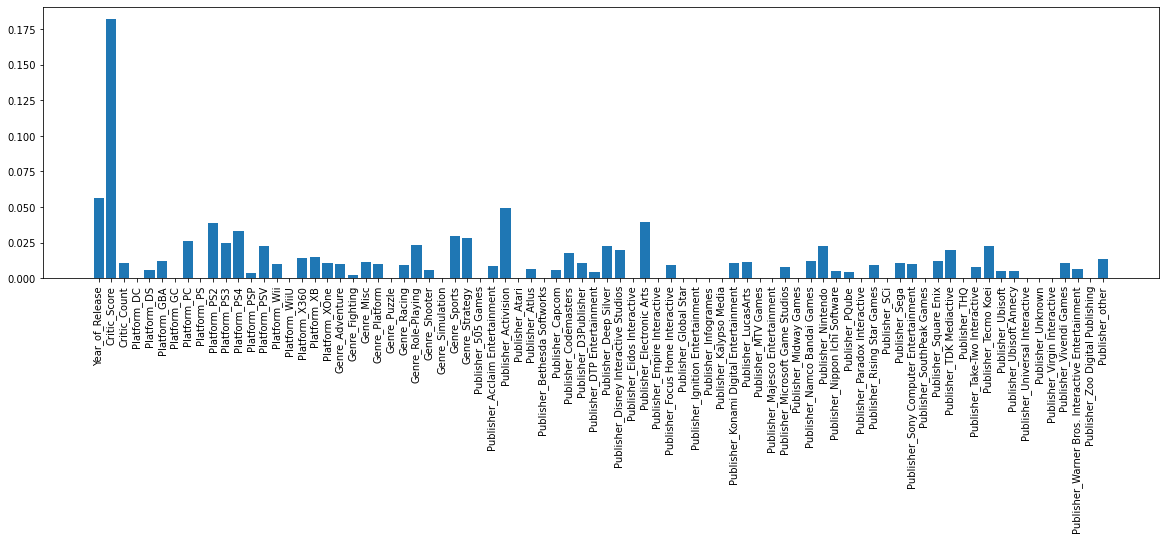

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()